<a href="https://colab.research.google.com/github/henterm/linked-blog-starter-md/blob/main/lab02_part2_overfitting_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os


device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')

root_path = 'fmnist'
mkdir(root_path)

Directory fmnist is created!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path,
                                                        train=True,
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path,
                                                       train=False,
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.4MB/s]


Extracting fmnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 164kB/s]


Extracting fmnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.24MB/s]


Extracting fmnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fmnist/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 19.0MB/s]

Extracting fmnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fmnist/FashionMNIST/raw



In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train,
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [5]:
len(fmnist_dataset_test)

10000

In [6]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

**Архитектура сети**

Для достижения точности ≥ 0.885 на Fashion-MNIST, можно создать сеть с несколькими полносвязными слоями, используя активационные функции, такие как ReLU, и регуляризацию с помощью Dropout и BatchNormalization.

Пример архитектуры:



*   Вход: 28x28 (размер изображения)
*   Несколько полносвязных слоев с Dropout и BatchNorm для регуляризации
*   Активация: ReLU
*   Выход: 10 классов (Softmax на последнем слое)

In [9]:
class TinyNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10, input_channels=1):
        super(self.__class__, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [10]:
torchsummary.summary(TinyNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 512]         401,920
       BatchNorm1d-3                  [-1, 512]           1,024
              ReLU-4                  [-1, 512]               0
           Dropout-5                  [-1, 512]               0
            Linear-6                  [-1, 256]         131,328
       BatchNorm1d-7                  [-1, 256]             512
              ReLU-8                  [-1, 256]               0
           Dropout-9                  [-1, 256]               0
           Linear-10                   [-1, 10]           2,570
Total params: 537,354
Trainable params: 537,354
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 2.05
Estimated T

Your experiments come here:

Epoch 1/20, Train Loss: 0.5439, Test Loss: 0.4224, Test Accuracy: 84.03%
Epoch 2/20, Train Loss: 0.3646, Test Loss: 0.3616, Test Accuracy: 86.58%
Epoch 3/20, Train Loss: 0.3240, Test Loss: 0.3811, Test Accuracy: 85.48%
Epoch 4/20, Train Loss: 0.2952, Test Loss: 0.3334, Test Accuracy: 87.65%
Epoch 5/20, Train Loss: 0.2763, Test Loss: 0.3325, Test Accuracy: 87.89%
Epoch 6/20, Train Loss: 0.2617, Test Loss: 0.3345, Test Accuracy: 87.20%
Epoch 7/20, Train Loss: 0.2486, Test Loss: 0.3336, Test Accuracy: 87.66%
Epoch 8/20, Train Loss: 0.2346, Test Loss: 0.3298, Test Accuracy: 88.65%
Epoch 9/20, Train Loss: 0.2227, Test Loss: 0.3082, Test Accuracy: 88.76%
Epoch 10/20, Train Loss: 0.2151, Test Loss: 0.3229, Test Accuracy: 88.97%
Epoch 11/20, Train Loss: 0.2050, Test Loss: 0.3174, Test Accuracy: 88.76%
Epoch 12/20, Train Loss: 0.1949, Test Loss: 0.3120, Test Accuracy: 89.33%
Epoch 13/20, Train Loss: 0.1864, Test Loss: 0.3436, Test Accuracy: 88.65%
Epoch 14/20, Train Loss: 0.1810, Test Loss: 0.3

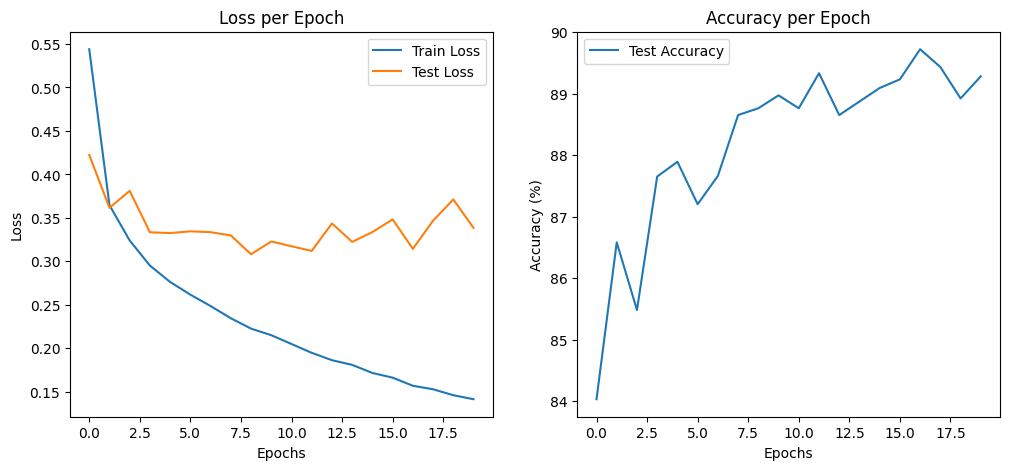

In [11]:
model = TinyNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

# Функция для тренировки модели
def train_model(model, train_loader, test_loader, opt, loss_func, epochs=10):
    model.train()
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct, total = 0, 0

        # Тренировочный цикл
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            opt.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels)
            loss.backward()
            opt.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Валидационный цикл
        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_func(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_accuracies.append(test_acc)
        test_losses.append(test_loss / len(test_loader))

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_acc:.2f}%')

    return train_losses, test_losses, test_accuracies

# Тренировка модели
train_losses, test_losses, test_accuracies = train_model(model, train_loader, test_loader, opt, loss_func, epochs=20)

# Построение графиков потерь и точности
def plot_training(train_losses, test_losses, test_accuracies):
    plt.figure(figsize=(12, 5))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

plot_training(train_losses, test_losses, test_accuracies)

### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

Чтобы продемонстрировать переобучение, мы создадим сеть с большим количеством параметров и сложностью, которая будет слишком мощной для простого набора данных Fashion-MNIST. Это приведет к сильному переобучению. Также можно уменьшить размер тренировочного набора данных, чтобы сделать задачу более "легкой" для сети, что еще больше усилит переобучение.

**Архитектура сети для переобучения:**
Мы добавим несколько слоев с большим количеством нейронов и уберем регуляризующие элементы, такие как Dropout и BatchNorm. Это увеличит вероятность переобучения.

In [12]:
class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10):
        super(OverfittingNeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [13]:
torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1024]         803,840
              ReLU-3                 [-1, 1024]               0
            Linear-4                  [-1, 512]         524,800
              ReLU-5                  [-1, 512]               0
            Linear-6                  [-1, 256]         131,328
              ReLU-7                  [-1, 256]               0
            Linear-8                  [-1, 128]          32,896
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 1,494,154
Trainable params: 1,494,154
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 5.70
Estimat

Epoch 1/20, Train Loss: 2.1023, Test Loss: 1.5271, Test Accuracy: 46.49%
Epoch 2/20, Train Loss: 1.1823, Test Loss: 1.0448, Test Accuracy: 57.50%
Epoch 3/20, Train Loss: 0.9200, Test Loss: 0.9871, Test Accuracy: 60.17%
Epoch 4/20, Train Loss: 0.8798, Test Loss: 0.9104, Test Accuracy: 65.26%
Epoch 5/20, Train Loss: 0.7554, Test Loss: 0.8107, Test Accuracy: 68.39%
Epoch 6/20, Train Loss: 0.6811, Test Loss: 0.7409, Test Accuracy: 68.92%
Epoch 7/20, Train Loss: 0.5838, Test Loss: 0.6756, Test Accuracy: 74.10%
Epoch 8/20, Train Loss: 0.5477, Test Loss: 0.7663, Test Accuracy: 72.77%
Epoch 9/20, Train Loss: 0.4687, Test Loss: 0.6541, Test Accuracy: 77.34%
Epoch 10/20, Train Loss: 0.4219, Test Loss: 0.7674, Test Accuracy: 72.15%
Epoch 11/20, Train Loss: 0.4484, Test Loss: 0.6613, Test Accuracy: 75.39%
Epoch 12/20, Train Loss: 0.4109, Test Loss: 0.6998, Test Accuracy: 75.97%
Epoch 13/20, Train Loss: 0.3510, Test Loss: 0.6689, Test Accuracy: 77.96%
Epoch 14/20, Train Loss: 0.3231, Test Loss: 0.7

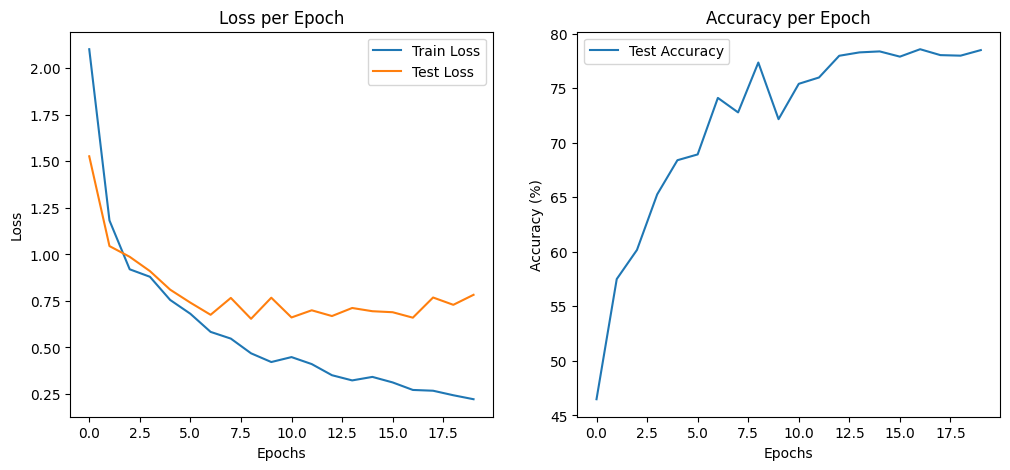

In [15]:
# Уменьшаем размер тренировочного набора для усиления эффекта переобучения
small_train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, batch_size=128, num_workers=2, sampler=torch.utils.data.SubsetRandomSampler(range(1000)))

# Инициализация модели, оптимизатора и функции потерь
model_overfit = OverfittingNeuralNetwork().to(device)
opt_overfit = torch.optim.Adam(model_overfit.parameters(), lr=0.001)
loss_func_overfit = nn.CrossEntropyLoss()

# Функция для тренировки модели и сбора данных для графиков
def train_model(model, train_loader, test_loader, opt, loss_func, epochs=10):
    model.train()
    train_losses = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        running_loss = 0.0

        # Тренировка
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            opt.zero_grad()
            outputs = model(images)
            loss = loss_func(outputs, labels)
            loss.backward()
            opt.step()
            running_loss += loss.item()

        train_losses.append(running_loss / len(train_loader))

        # Оценка на тесте
        model.eval()
        test_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = loss_func(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
        test_accuracies.append(test_acc)
        test_losses.append(test_loss / len(test_loader))

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_acc:.2f}%')

    return train_losses, test_losses, test_accuracies

# Тренировка модели с переобучением
train_losses_overfit, test_losses_overfit, test_accuracies_overfit = train_model(model_overfit, small_train_loader, test_loader, opt_overfit, loss_func_overfit, epochs=20)

# Построение графиков
def plot_training(train_losses, test_losses, test_accuracies):
    plt.figure(figsize=(12, 5))

    # График потерь
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # График точности
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.show()

# Построение графиков для переобученной модели
plot_training(train_losses_overfit, test_losses_overfit, test_accuracies_overfit)

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

In [16]:
class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10):
        super(FixedNeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, num_classes)
        )

    def forward(self, inp):
        out = self.model(inp)
        return out

In [17]:
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                 [-1, 1024]         803,840
       BatchNorm1d-3                 [-1, 1024]           2,048
              ReLU-4                 [-1, 1024]               0
           Dropout-5                 [-1, 1024]               0
            Linear-6                  [-1, 512]         524,800
       BatchNorm1d-7                  [-1, 512]           1,024
              ReLU-8                  [-1, 512]               0
           Dropout-9                  [-1, 512]               0
           Linear-10                  [-1, 256]         131,328
      BatchNorm1d-11                  [-1, 256]             512
             ReLU-12                  [-1, 256]               0
          Dropout-13                  [-1, 256]               0
           Linear-14                  [

Epoch 1/20, Train Loss: 2.1410, Test Loss: 2.1779, Test Accuracy: 53.30%
Epoch 2/20, Train Loss: 1.9260, Test Loss: 1.5199, Test Accuracy: 52.40%
Epoch 3/20, Train Loss: 1.1767, Test Loss: 1.0153, Test Accuracy: 60.25%
Epoch 4/20, Train Loss: 0.9577, Test Loss: 0.9793, Test Accuracy: 65.25%
Epoch 5/20, Train Loss: 0.8261, Test Loss: 0.7872, Test Accuracy: 69.10%
Epoch 6/20, Train Loss: 0.7161, Test Loss: 0.7271, Test Accuracy: 72.47%
Epoch 7/20, Train Loss: 0.6353, Test Loss: 0.7139, Test Accuracy: 71.57%
Epoch 8/20, Train Loss: 0.5892, Test Loss: 0.6953, Test Accuracy: 73.47%
Epoch 9/20, Train Loss: 0.5397, Test Loss: 0.6934, Test Accuracy: 74.07%
Epoch 10/20, Train Loss: 0.5195, Test Loss: 0.7090, Test Accuracy: 72.23%
Epoch 11/20, Train Loss: 0.5100, Test Loss: 0.6993, Test Accuracy: 74.55%
Epoch 12/20, Train Loss: 0.5095, Test Loss: 0.6516, Test Accuracy: 75.93%
Epoch 13/20, Train Loss: 0.4633, Test Loss: 0.6355, Test Accuracy: 76.53%
Epoch 14/20, Train Loss: 0.4259, Test Loss: 0.6

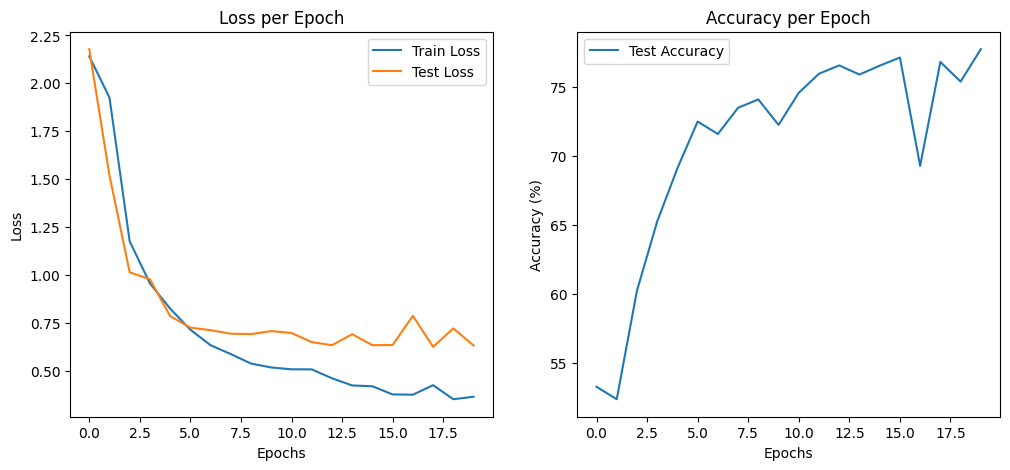

In [23]:
# Инициализация новой модели
model_fixed = FixedNeuralNetwork().to(device)
opt_fixed = torch.optim.Adam(model_fixed.parameters(), lr=0.001, weight_decay=0.01)  # Добавляем weight_decay для регуляризации
loss_func_fixed = nn.CrossEntropyLoss()

# Тренировка новой модели
train_losses_fixed, test_losses_fixed, test_accuracies_fixed = train_model(model_fixed, small_train_loader, test_loader, opt_fixed, loss_func_fixed, epochs=20)

# Построение графиков для исправленной модели
plot_training(train_losses_fixed, test_losses_fixed, test_accuracies_fixed)

### Conclusions:

Использование регуляризации, такой как Dropout, BatchNormalization и weight decay, помогает существенно уменьшить переобучение, что демонстрируется улучшением точности на тестовой выборке и снижением тестовых потерь.